In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
from networkx.algorithms.approximation import average_clustering
from thinkstats2 import Pmf, thinkplot, Cdf

# Exercise 4.2

NeworkX provides a function called ``powerlaw_cluster_graph`` that implements the *Holme and Kim algorithm for growing graphs with powerlaw degree distribution and approximate average clustering*. In this exercise, we try to generate a graph that has the same number of nodes as the Facebook dataset, the same average degree, and the same clustering coefficient. We also determine how does the degree distribution in the model compare to the actual distribution.

In the first two cells, we have checked the average clustering for a power cluster graph with th same number of nodes and average degree as the Facebook data set. We then plot the average clustering as a function of $p$ or the probability of rewiring an edge.

In [2]:
def read_graph(filename):
  G = nx.Graph()
  array = np.loadtxt(filename, dtype=int)
  G.add_edges_from(array)
  return G

fb = read_graph('facebook_combined.txt.gz')
n = len(fb)
m = len(fb.edges())
n, m

(4039, 88234)

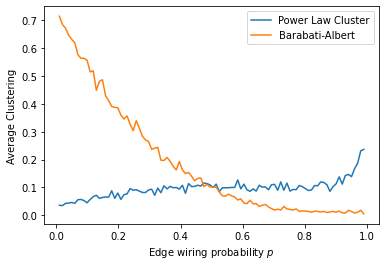

In [3]:
n_fb = len(fb)
k_fb = 22
k_ws = int(round(2*m/n))
p_fb = 1
p_ws = 0.051

pc = nx.powerlaw_cluster_graph(n_fb, k_fb, p_fb)
ws = nx.watts_strogatz_graph(n_fb, k_ws, p_ws)

def sample_path_lengths(G, nodes=None, trials=1000):
    if nodes is None:
        nodes = list(G)
    else:
        nodes = list(nodes)
    pairs = np.random.choice(nodes, (trials, 2))
    lengths = [nx.shortest_path_length(G, *pair)
              for pair in pairs]
    return lengths

def estimate_path_lengths(G, nodes=None, trials=1000):
    return np.mean(sample_path_lengths(G, nodes, trials))

def degrees(G):
    return [G.degree(u) for u in G]

def pc_func(p_fb):
    return nx.powerlaw_cluster_graph(n_fb, k_fb, p_fb)

def ws_func(p_fb):
    return nx.watts_strogatz_graph(n_fb, k_ws, p_fb)

p_fb_array = np.linspace(0.01,0.99,num=100)

C_pc_values = []
for i in p_fb_array:
    some_entry = average_clustering(pc_func(i), trials=1000)
    C_pc_values.append(some_entry)
    
C_ws_values = []
for i in p_fb_array:
    some_entry = average_clustering(ws_func(i), trials=1000)
    C_ws_values.append(some_entry)



plt.plot(p_fb_array, C_pc_values)
plt.plot(p_fb_array, C_ws_values)
plt.legend(["Power Law Cluster", "Barabati-Albert", "Watts-Strogatz"])
plt.xlabel("Edge wiring probability $p$")
plt.ylabel("Average Clustering")
plt.show()

WS C Max:  0.608 , WS L Max:  3.21
PC C Max:  0.26466 , PC L Max:  2.782


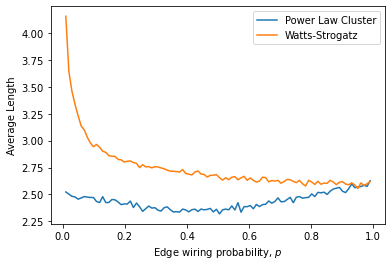

Maximum Average Clustering:  0.26466
Average Length:  2.782


In [7]:
C_max_ws = average_clustering(ws, trials=1000)
L_max_ws = estimate_path_lengths(ws)

C_max_pc = average_clustering(pc, trials=100000)
L_max_pc = estimate_path_lengths(pc)


print("WS C Max: ", C_max_ws,", WS L Max: ", L_max_ws)
print("PC C Max: ", C_max_pc,", PC L Max: ", L_max_pc)

L_pc_values = []
for i in p_fb_array:
    some_entry = estimate_path_lengths(pc_func(i))
    L_pc_values.append(some_entry)
    
L_ws_values = []
for i in p_fb_array:
    some_entry = estimate_path_lengths(ws_func(i))
    L_ws_values.append(some_entry)

    
L_ba_values = []
for i in p_fb_array:
    some_entry = estimate_path_lengths(ws_func(i))
    L_ba_values.append(some_entry)
    
plt.plot(p_fb_array, L_pc_values)
plt.plot(p_fb_array, L_ws_values)
plt.xlabel("Edge wiring probability, $p$")
plt.ylabel("Average Length")
plt.legend(["Power Law Cluster", "Watts-Strogatz"])
plt.show()

print("Maximum Average Clustering: ", C_max_pc)
print("Average Length: ", L_max_pc)

As we see here, the maximum average clustering of the Power Law cluster graph is much lower than that of the Watts-Strogatz model. Further, the average length of each cluster for the Power Law cluster graph is shorter than the Facebook model.

We then analyze the Probability Distribution Function (PDF) of the degrees of the distribution. This can be done by investigating the mean and the standard deviation of the distribution.

In [8]:
def degrees(G):
    return [G.degree(u) for u in G]

ba = nx.barabasi_albert_graph(n, k_fb)

pmf_fb = Pmf(degrees(fb))
print("Mean FB: ",pmf_fb.Mean(),", StDev FB: ", pmf_fb.Std())

pmf_ws = Pmf(degrees(ws))
print("Mean Watts-Strogatz: ",pmf_ws.Mean(),", StDev Watts-Strogatz: ", pmf_ws.Std())

pmf_ba = Pmf(degrees(ba))
print("Mean Barabasi-Albert: ",pmf_ba.Mean(),", StDev Barabasi-Albert: ", pmf_ba.Std())

pmf_pc = Pmf(degrees(pc))
print("Mean Power Law Cluster: ", pmf_pc.Mean(),", StDev Power Law Cluster: ", pmf_pc.Std())


Mean FB:  43.69101262688786 , StDev FB:  52.41411556737523
Mean Watts-Strogatz:  44.0 , StDev Watts-Strogatz:  1.4955575049315453
Mean Barabasi-Albert:  43.76033671700917 , StDev Barabasi-Albert:  41.05567209806864
Mean Power Law Cluster:  43.75538499628622 , StDev Power Law Cluster:  42.43297241417385


As we see here, the mean for Facebook data set, Watts-Strogatz graph and Power Cluster lie at the range 43.6-44.0. However, compared with the Watts-Strogatz graph, the Powerlaw Cluster Graph has a nearer standard deviation to the Facebook data set. 

We then plot the PDF as a function of number of degrees in a log-log scale. The plots are shown below.

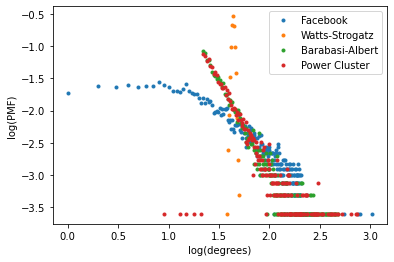

In [9]:
def log_pmf(u):
    log_value = []
    this_pmf = Pmf(degrees(u))
    for i in this_pmf:
        log_value.append(np.log10(this_pmf[i]))
    return log_value

def log_pmf_x(u):
    log_value = []
    this_pmf = Pmf(degrees(u))
    for i in this_pmf:
        log_value.append(np.log10(i))
    return log_value

plt.plot(log_pmf_x(fb),log_pmf(fb),'.')
plt.plot(log_pmf_x(ws),log_pmf(ws),'.')
plt.plot(log_pmf_x(ba),log_pmf(ba),'.')
plt.plot(log_pmf_x(pc),log_pmf(pc),'.')
plt.xlabel("log(degrees)")
plt.ylabel("log(PMF)")
plt.legend(["Facebook", "Watts-Strogatz", "Barabasi-Albert", "Power Cluster"])
plt.show()

In the plot, we see that both the Facebook data set and Power cluster graph are apprently heavily tailed. This is compared to the Watts-Strogatz distrbution which does not. 

Finally, we obtained the cumulative distribution function (CDF) of the Power Law Cluster distribution and compare it to the Facebook data set.

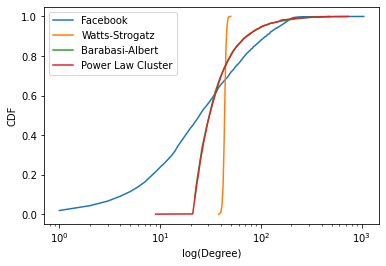

In [10]:
cdf_fb = Cdf(degrees(fb))
cdf_pc = Cdf(degrees(pc))
cdf_ws = Cdf(degrees(ws))

def cdf_x(u):
    return Cdf(degrees(u)).xs

def cdf_y(u):
    return Cdf(degrees(u)).ps


plt.plot(cdf_x(fb),cdf_y(fb))
plt.plot(cdf_x(ws),cdf_y(ws))
plt.plot(cdf_x(ba),cdf_y(ba))
plt.plot(cdf_x(pc),cdf_y(pc))
plt.xlabel("log(Degree)")
plt.ylabel("CDF")
plt.xscale('log')
plt.legend(["Facebook", "Watts-Strogatz", "Barabasi-Albert", "Power Law Cluster"])
plt.show()

Observe that the Power Law cluster distribution coincides with the Facebook data set for long tailed parts of the distribution. This means that for for higher CDF values, the Power Law Cluster can model the Facebook data set. Further, the Barabasi-Albert and Power Law cluster disrbitutions amlost coincide in all degree values. The main difference between the two is the low tail part, where the BA model suddenly stops. This is in contrast with the Watts-Strogatz plot which is inaccurate for these regions.

The following table summarizes the quantities we obtained at certain values of $p$:

| Parameters | Facebook Data | Watts-Strogatz | Barabasi-Albert | Power Law Cluster |
|---|---|---|---|---|
|Number of nodes | $n$ | $n$ | $n$ | $n$ |
|$k$| 22 | 44 | 22 | 22 |
|$C$| 0.61 | 0.63 | 0.037 | 0.256 |
|$L$| 3.69 | 3.23 | 2.51 | 2.75 |
|Mean degree| 43.7 | 44 | 43.7 | 43.7 |
|StDev degree| 52.4 | 1.5 | 40.1 | 44.0 |